“labDrawDice.ipynb” - Создает изображение с случайным символом на случайном фоне.  
`Параметры:`
- size (int): Размер изображения (ширина и высота). 
`Возвращает:`
Image: Изображение с случайным символом.
`Помним:`
  - правильные названия функций, название параметров, аннотация типов, проверка входящих параметров и т.п.
- Проверка:
  - показать использование этой функции на различных примерах с различными параметрами
  - показать как создается случайную грань кубика (функция возвращает картинку)


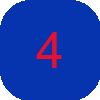

In [38]:
from PIL import Image, ImageDraw, ImageFont
import random

ROMAN_NUMERALS = ['I', 'II', 'III', 'IV', 'V', 'VI']
DOT_POSITIONS = {
    1: [(4, 4)],
    2: [(2, 2), (6, 6)],
    3: [(2, 2), (4, 4), (6, 6)],
    4: [(2, 2), (2, 6), (6, 2), (6, 6)],
    5: [(2, 2), (2, 6), (4, 4), (6, 2), (6, 6)],
    6: [(2, 2), (2, 4), (2, 6), (6, 2), (6, 4), (6, 6)]
}

def DrawDice(size=200, face=None, corner_radius=0):
    
    if face is None:
        face = random.randint(1, 6)
    else:
        face = max(1, min(6, face))  
    
    image = Image.new('RGBA', (size, size), (255, 255, 255, 0))
    draw = ImageDraw.Draw(image)
    
    
    background_color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    
   
    draw.rounded_rectangle([(0, 0), (size, size)], fill=background_color, radius=corner_radius)
    
   
    symbol = random.choice(['dots', 'numbers', 'roman'])
    font = ImageFont.truetype('arial.ttf', size // 2)
    text_color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    
    if symbol == 'dots':
        dot_size = size // 10
        dot_positions = DOT_POSITIONS[face]
        for x, y in dot_positions:
            x = (x * size) // 8
            y = (y * size) // 8
            draw.ellipse([(x - dot_size // 2, y - dot_size // 2), (x + dot_size // 2, y + dot_size // 2)], fill=text_color)
    elif symbol == 'numbers':
        text = str(face)
        text_bbox = draw.textbbox((0, 0), text, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]
        text_x = (size - text_width) // 2 - text_bbox[0]
        text_y = (size - text_height) // 2 - text_bbox[1]
        draw.text((text_x, text_y), text, font=font, fill=text_color)
    else:
        roman_numeral = ROMAN_NUMERALS[face - 1]
        text_bbox = draw.textbbox((0, 0), roman_numeral, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]
        text_x = (size - text_width) // 2 - text_bbox[0]
        text_y = (size - text_height) // 2 - text_bbox[1]
        draw.text((text_x, text_y), roman_numeral, font=font, fill=text_color)
    
    return image

dice = DrawDice(size=100, face=4, corner_radius=30)
display(dice)

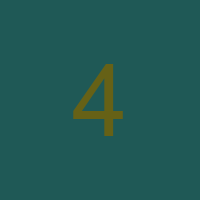

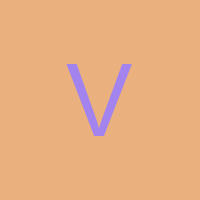

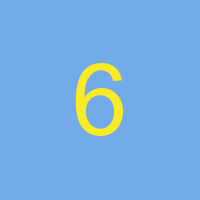

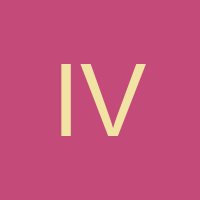

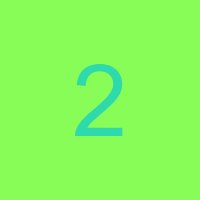

In [24]:
for i in range(5):
    random_image = DrawDice()
    display(random_image)